In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
blind = pd.read_csv("../psrc_lists/uncleaned_psrcs_sigma__2aspcmsubqm2_fitel_0f09-to-35f5Hz_qc_0p6rr_M_PdoCals_dt20_snr_iter1_4.0sigma.csv")
f_blind= blind.loc[(blind["theta_1"]==2.0)&(blind["theta_2"]==6.0)]
fluxes_blind = f_blind["amp_fit"]*1000
h_blind,b_blind = np.histogram(fluxes_blind,bins=np.linspace(0,25,100))
c_hist_blind = np.cumsum(h_blind[::-1])[::-1]/243

matched = pd.read_csv("../psrc_lists/matched_9arcsec_1and2_best1_vlass.csv")
f_matched = matched.loc[(matched["theta_1"]==2.0)&(matched["theta_2"]==6.0)]
unq, unq_idx, unq_cnt = np.unique(np.array(list(f_matched["cluster"])), return_inverse=True, return_counts=True)
doubled = np.where(unq_cnt>1)
for i in range(len(doubled)):
    cluster_doub = f_matched.loc[f_matched["cluster"]==doubled]
fluxes_matched = f_matched["amp_fit"]*1000
h_match,b_match = np.histogram(fluxes_matched,bins=np.linspace(0,25,26))
c_hist_match = np.cumsum(h_match[::-1])[::-1]/243

In [5]:
unq, unq_idx, unq_cnt = np.unique(np.array(list(f_matched["cluster"])), return_inverse=True, return_counts=True)

In [6]:
unq[1]

'ACT-CLJ0201.6-0211'

Text(0, 0.5, 'Cumulative fraction of cluster')

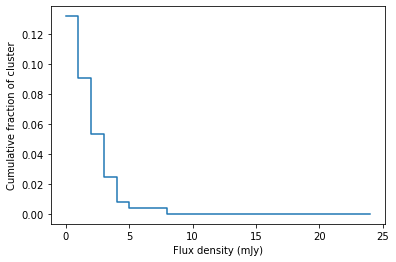

In [83]:
plt.step(b_match[:-1],c_hist_match,where="post")
plt.xlabel("Flux density (mJy)")
plt.ylabel("Cumulative fraction of cluster")

Text(0, 0.5, 'Normalized source count by area')

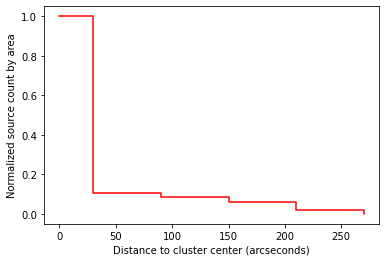

In [84]:
histo, bins = np.histogram(f_matched["dist_center_radians"]*180/np.pi*3600,bins=[0,30,90,150,210,270,300])
norm_area = np.pi*30**2/histo[0]
n_arr = []
i=1
for i in range(len(bins)):
    area = np.pi*bins[i]**2 - np.pi*(bins[i-1])**2
    norm_c = norm_area/area
    n_arr = np.append(n_arr,norm_c)
plt.step(bins[:-1],histo*n_arr[1:],where="post",c="r")
plt.xlabel("Distance to cluster center (arcseconds)")
plt.ylabel("Normalized source count by area")

Text(0, 0.5, 'Peak flux (mJy)')

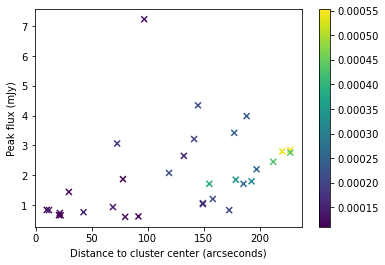

In [15]:
plt.scatter(f_matched["dist_center_radians"]*180/np.pi*3600, f_matched["amp_fit"]*1000,marker="x",c=f_matched["noise_ps"])
plt.colorbar()
plt.xlabel("Distance to cluster center (arcseconds)")
plt.ylabel("Peak flux (mJy)")

Text(0, 0.5, 'Peak flux (mJy)')

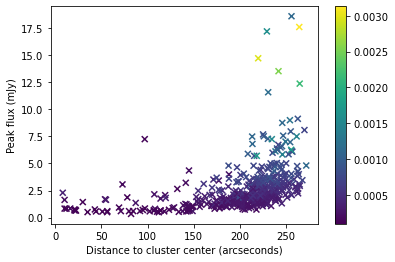

In [16]:
plt.scatter(f_blind["dist_center_radians"]*180/np.pi*3600, f_blind["amp_fit"]*1000,marker="x",c=f_blind["noise_ps"])
plt.colorbar()
plt.xlabel("Distance to cluster center (arcseconds)")
plt.ylabel("Peak flux (mJy)")